# MASH results on V8 data
Basically same parameter setting as MASH paper.

Here I explore results from a later run on V8 data using the refactored `mashr`, and compare results with analysis in mash paper on V6 data. The data was analyzed by procedures [documented here](20171002_MASH_V8.html), with parameters used in MASH paper. 


To reproduce:

```
sos run analysis/20171002_MASH_V8.ipynb mash
```

Note: this workflow includes $X^TX$ in the prior, thus is slower than without.

In [1]:
library(lattice)
library(ggplot2)
library(colorRamps)
library(mashr)
library(repr)

thresh_inconsistent=function(effectsize,thresh,sigs){
  z= sapply(seq(1:nrow(effectsize)),function(x){
    l=sigs[x,];p=effectsize[x,];plow=p[which(l<thresh)];##grab only those posterior means that are 'significant'
    if(length(plow)==0){return("FALSE")}##for ones who show no significants, they can't be heterogenous
    else{pos=sum(plow>0);neg=sum(plow<0);pos*neg!=0}
  })
  return(sum(z==TRUE))}

het.norm = function(effectsize) {
  t(apply(effectsize,1,function(x){
    x/x[which.max(abs(x))]
  }))
}

sign.norm = function(effectsize) {
  t(apply(effectsize,1,function(x){
    x/sign(x[which.max(abs(x))])
  }))}

sign.tissue.func = function(normdat){
  apply(normdat,1,function(x){
    sum(x<0)})}

het.func = function (normdat, threshold) {
    apply((normdat),1,function(x){sum(x > threshold)})
}

hlindex=function(normdat,sigdat,thresh1,thresh2){
    hl=NULL
    for(j in 1:nrow(normdat)){
        hl[j]=sum(normdat[j,]>thresh1&sigdat[j,]<thresh2)}
    return(hl)}

het.index.two=function(data,thresh){
    t(apply(data,1,function(x){
        maxx=x[which.max(abs(x))]
        if(maxx==0){h=0}
        else{
            normx=x/x[which.max(abs(x))]
            
            h=sum(normx>thresh)}
        
        return(h)
        
    }))}

# Compute RMSE.
rmse <- function(truth, estimate)
  sqrt(mean((truth - estimate)^2))


Loading required package: ashr


In [2]:
res = readRDS('~/Documents/GTExV8/MASH/GTExV8.ciseQTL.4MASH.xtx.K5.P3.V1.mash_model.rds')
res$result = readRDS('~/Documents/GTExV8/MASH/GTExV8.ciseQTL.4MASH.xtx.K5.P3.V1.mash_posterior.rds')

## MASH model fit
The log-likelihood of fit is:

In [3]:
get_loglik(res)

[1] -9956894

**This loglik is smaller than that from V6 data by 10 times!?** But it is smaller than [without using X'X in priors](20171003_MASH_Results.html).

Here is a plot of weights learned.

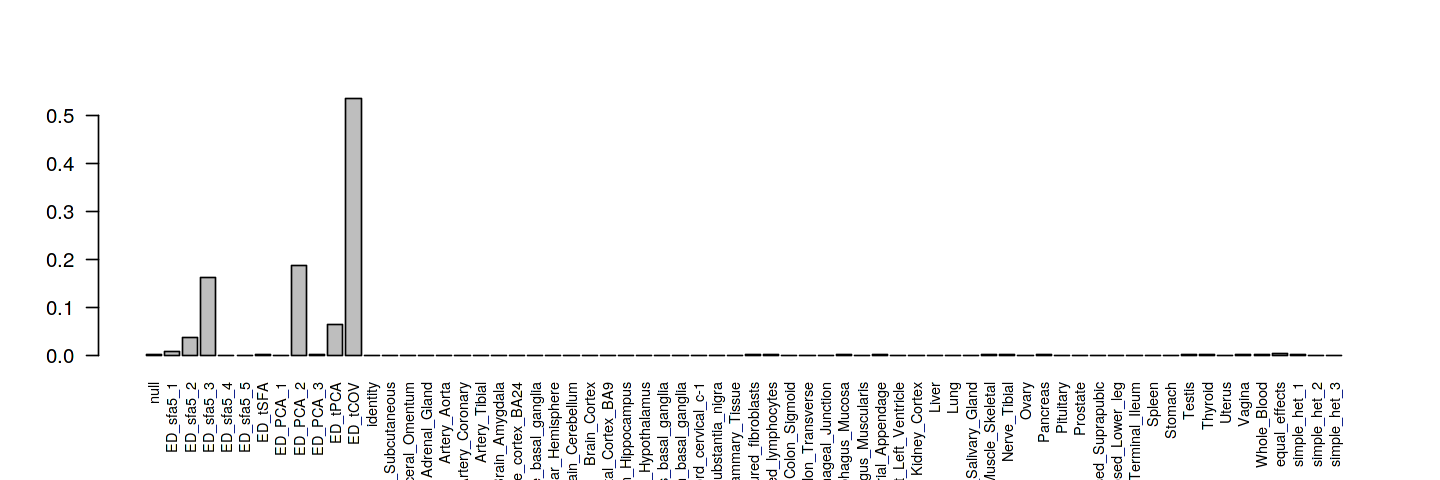

In [4]:
options(repr.plot.width=12, repr.plot.height=4)
barplot(get_estimated_pi(res), las = 2, cex.names = 0.7)

Here, matrix X'X accounts for over 50% of all weights in the GTEx data.